In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = yf.download("GLD", "2019-01-01", "2021-01-01")

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,121.349998,121.750000,120.879997,121.330002,121.330002,12776200
2019-01-03,121.779999,122.459999,121.730003,122.430000,122.430000,15440800
2019-01-04,121.320000,121.599998,120.690002,121.440002,121.440002,13334000
2019-01-07,122.160004,122.220001,121.570000,121.860001,121.860001,7473600
2019-01-08,121.150002,121.709999,121.059998,121.529999,121.529999,7643100
...,...,...,...,...,...,...
2020-12-24,175.550003,176.369995,175.509995,176.350006,176.350006,3695400
2020-12-28,177.259995,177.910004,175.630005,175.710007,175.710007,7778700
2020-12-29,176.250000,176.970001,175.570007,176.350006,176.350006,5983700


In [4]:
prices = data["Adj Close"]

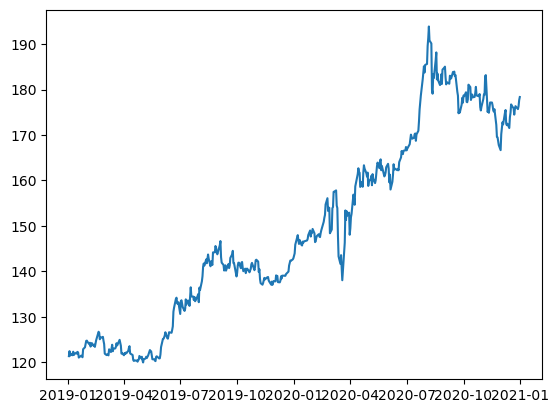

In [5]:
plt.plot(prices)

In [6]:
print(prices.max(), prices.min(), prices.mean(), prices.std(), prices.var())

193.88999938964844 119.94000244140625 149.120138323189 20.788431582787982 432.1588876722569


In [7]:
MA30 = prices.rolling(30).mean()

In [8]:
MA50 = prices.rolling(50).mean()

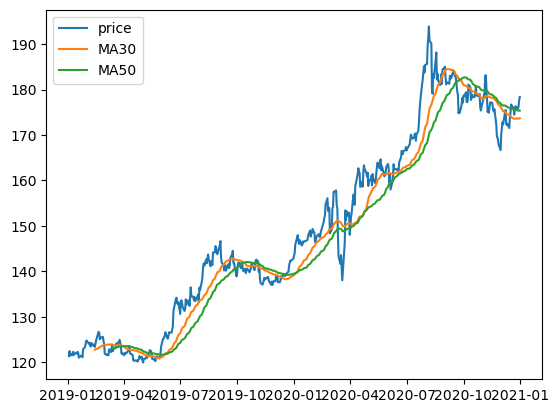

In [9]:
plt.plot(prices)
plt.plot(MA30)
plt.plot(MA50)
plt.legend(['price', 'MA30', 'MA50'])

In [10]:
EMA30 = prices.ewm(span=30).mean()
EMA50 = prices.ewm(span=50).mean()

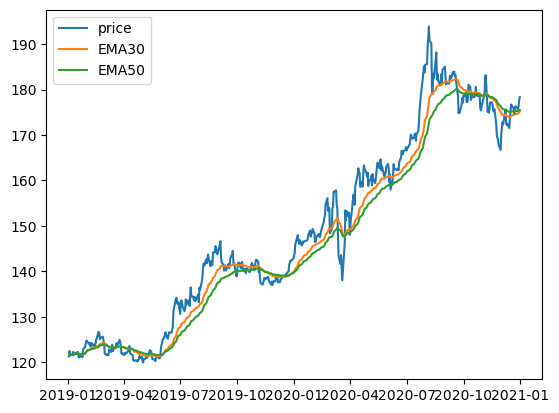

In [11]:
plt.plot(prices)
plt.plot(EMA30)
plt.plot(EMA50)
plt.legend(['price', 'EMA30', 'EMA50'])

In [12]:
upper  = prices.rolling(window=50).mean() + prices.rolling(window=50).std() * 2
bottom = prices.rolling(window=50).mean() - prices.rolling(window=50).std() * 2

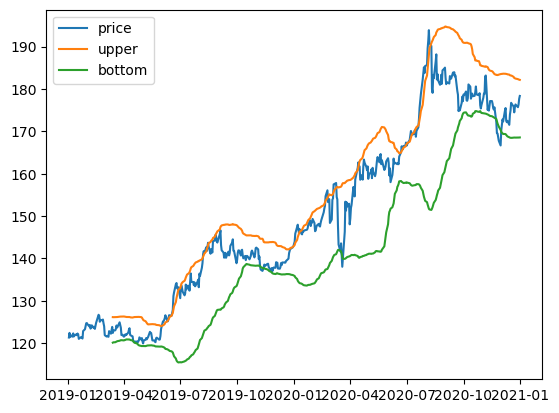

In [13]:
plt.plot(prices)
plt.plot(upper)
plt.plot(bottom)
plt.legend(['price', 'upper', 'bottom'])

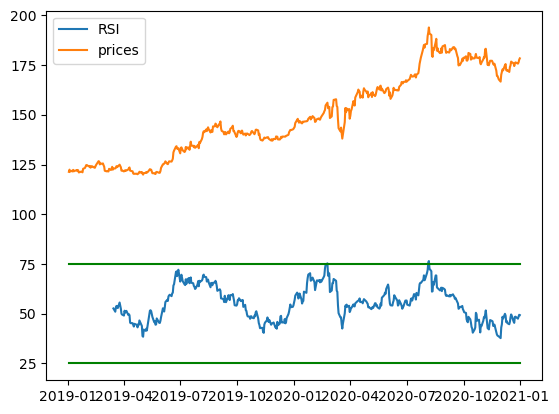

In [16]:
profit  = prices.diff(1)
gain = profit.clip(lower = 0)
loss = profit.clip(upper = 0).abs()

rs = gain.rolling(window=50).mean() / loss.rolling(window=50).mean()
RSI = (100 - (100 / (1.0 + rs)))
data['up'] = 75
data['bot'] = 25

plt.plot(RSI, label='RSI')
plt.plot(prices, label='prices')
plt.plot(data['bot'], c = 'g')
plt.plot(data['up'], c = 'g')
plt.legend(loc='best')

In [15]:
data


,Open,High,Low,Close,Adj Close,Volume,up,bot
Date,,,,,,,,
2019-01-02,121.349998,121.750000,120.879997,121.330002,121.330002,12776200,75,25
2019-01-03,121.779999,122.459999,121.730003,122.430000,122.430000,15440800,75,25
2019-01-04,121.320000,121.599998,120.690002,121.440002,121.440002,13334000,75,25
2019-01-07,122.160004,122.220001,121.570000,121.860001,121.860001,7473600,75,25
2019-01-08,121.150002,121.709999,121.059998,121.529999,121.529999,7643100,75,25
...,...,...,...,...,...,...,...,...
2020-12-24,175.550003,176.369995,175.509995,176.350006,176.350006,3695400,75,25
2020-12-28,177.259995,177.910004,175.630005,175.710007,175.710007,7778700,75,25
2020-12-29,176.250000,176.970001,175.570007,176.350006,176.350006,5983700,75,25
